# TP - Chaînes de Markov - HMMs

## Elève : Hiroto YAMAKAWA
### MS BGD 2019 - 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## I.1 Fonctions dont vous pouvez avoir besoin

In [2]:
bigrameng = np.loadtxt("bigramenglish.txt")

In [3]:
#Création du dictionnaire clé-valeur associant états et caractères :
# indices modifiés par rapport au sujet
dic = {0 : ' ', 1 : 'a', 2 : 'b', 3: 'c', 4 : 'd', 5 : 'e', 6: 'f',  7 : 'g', 8 : 'h', 9: 'i', 10 : 'j', 11 : 'k',
 12 : 'l', 13: 'm', 14 : 'n', 15 : 'o', 16: 'p', 17: 'q', 18: 'r' , 19: 's',  20: 't', 
 21: 'u', 22: 'v',  23 : 'w', 24 : 'x' , 25: 'y',  26 : 'z', 27 : ' ' }

In [4]:
dic_inv = {v: k for k, v in dic.items()}

## I.2 Chaîne de Markov

>On veut générer des mots dans une langue donnée en modélisant la formation de ces mots par une chaîne de Markov. Les 28 états du modèle correspondent aux 26 lettres de l’alphabet auxquelles et on ajoute un état ‘espace initial’ (état 1) et un état ‘espace final’ (état 28) qui sert à terminer les mots.
La correspondance entre la valeur numérique d’un état et un caractère est la suivante : 
>- l’état 1 correspond à un espace (avant le début d’un mot) et l’état 28 à celui d’un espace en fin de mot.
>- Les états 2 à 27 correspondent aux caractères de a à z. On pourra utiliser une structure de dictionnaire en python pour faire cette correspondance.
On utilisera une chaîne de Markov ergodique entre les 26 états correspondants aux lettres de l’alphabet.

### 1.2.a Matrice de transitions

*A quelles probabilités correspond la première ligne de la matrice de transition ? et celles de la
dernière colonne ?*


- la première ligne de la matrice correspond aux probabilités de passer de l'état initial ' ' aux autres états , c'est à dire de commencer par une certaine lettre

- la dernière ligne de la matrice correspond aux probabilités de passer d'un état quelconque à l'état final ' '


*Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre*

In [5]:
transition_max = np.argmax(bigrameng, axis = 1)

print('transition la plus fréquente pour:')
for i,j in enumerate(transition_max):
    num = i                     
    letter = dic[num]
    next_letter = dic[j]
    print(f'la lettre {letter}: \'{next_letter}\'')

transition la plus fréquente pour:
la lettre  : 't'
la lettre a: 'n'
la lettre b: 'e'
la lettre c: 'o'
la lettre d: ' '
la lettre e: ' '
la lettre f: ' '
la lettre g: ' '
la lettre h: 'e'
la lettre i: 'n'
la lettre j: 'o'
la lettre k: ' '
la lettre l: 'e'
la lettre m: 'e'
la lettre n: ' '
la lettre o: 'n'
la lettre p: 'e'
la lettre q: 'u'
la lettre r: 'e'
la lettre s: ' '
la lettre t: 'h'
la lettre u: 'r'
la lettre v: 'e'
la lettre w: 'a'
la lettre x: 't'
la lettre y: ' '
la lettre z: 'e'
la lettre  : ' '


### 1.2.b Générer un mot 

*Ecrire une fonction etat_suivant qui génère un état (à t+1) à partir de l’état courant (à t) et à
l’aide de la matrice de transitions et de la fonction de répartition*

In [6]:
def etat_suivant(state_t, mat):
    i = np.random.random() 
    fonction_rep_state_t = np.cumsum(mat[state_t,:])      
     
    next_state = np.where(i<fonction_rep_state_t)[0][0]                
    
    return next_state

*Afficher sur un graphique la fonction de répartition pour une ligne de la matrice de transition et expliquer son rôle pour la génération de l’état à t+1*

In [7]:
fonction_repartition = np.cumsum(bigrameng,axis =1)

In [8]:
fonction_repartition[4]

array([0.        , 0.03624126, 0.03627003, 0.03629879, 0.04348952,
       0.18040096, 0.18126384, 0.18500302, 0.18586591, 0.27589381,
       0.27618144, 0.27646907, 0.28624845, 0.29142578, 0.29430207,
       0.32910519, 0.32913395, 0.32916271, 0.34814623, 0.36828027,
       0.36830903, 0.38873069, 0.39160698, 0.39246987, 0.39249863,
       0.40112751, 0.40115627, 1.        ])

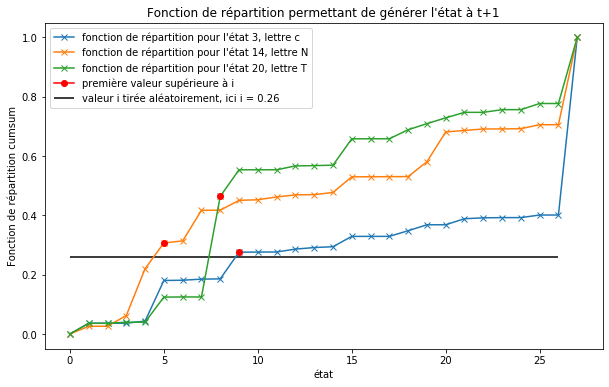

In [9]:
plt.figure(figsize=(10,6))
plt.title('Fonction de répartition permettant de générer l\'état à t+1')
plt.plot(fonction_repartition[4], label = 'fonction de répartition pour l\'état 3, lettre c' , marker ='x') 
plt.plot(fonction_repartition[14], label = 'fonction de répartition pour l\'état 14, lettre N', marker ='x') 
plt.plot(fonction_repartition[20], label = 'fonction de répartition pour l\'état 20, lettre T', marker ='x') 
plt.hlines(0.26, 0, 26, label = 'valeur i tirée aléatoirement, ici i = 0.26')
plt.plot(9,fonction_repartition[4][9] , 'red', marker ='o' , label = 'première valeur supérieure à i' )

plt.plot(5,fonction_repartition[14][5] , 'red', marker ='o' )
plt.plot(8,fonction_repartition[20][8] , 'red', marker ='o' )
plt.legend(loc = 'best')
plt.ylabel('Fonction de répartition cumsum')
plt.xlabel('état')
plt.show()

**Explication** : 
on se place à l'état t, soit sur l'une des 28 fonctions de répartition  (3 sont affichés au dessus) 

On tire une valeur aléatoire i comprise entre 0 et 1. On regarde ensuite la première valeur de la fonction de répartition plus grande que i.En inversant la fonction de répartition en cette valeur (qui consiste à regarder l'axe des abscisses sur le graphe) , on trouve l'état suivant.



*Utiliser cette fonction pour écrire la fonction genere_state_seq qui génère une séquence d’états jusqu’à aboutir à l’état final (27)* 

In [10]:
def genere_state_seq(mat):
    state = 0
    seq = [state]
    final_state = mat.shape[0]-1 
    while state != final_state:
        next_state = etat_suivant(state, mat)
        seq.append(next_state)
        state = next_state
    return seq

*Ecrire une fonction display_seq qui transforme une séquence d’états en séquence de caractères, à l’aide d’un dictionnaire*

In [11]:
def display_seq(seq,dic = dic) :
    sequence = [dic[i] for i in seq]
    return ''.join(sequence)

*Utiliser ces fonctions pour générer des mots et donner des exemples de mots générés*

In [12]:
print('exemples de mots générés:')
for i in range(5):
    test = genere_state_seq(bigrameng)
    print(display_seq(test))

exemples de mots générés:
 tisoon 
 se 
 r 
 as 
 auceilverem 


### 1.2.c Générer une phrase

> On veut générer une suite de mots (phrase). 

*Créer un état final de phrase (état 29,correspondant au caractère '.' ) dont la probabilité de transition vers cet état depuis un état final de mot est 0.1. Ecrire une fonction modifie_mat_dic qui modifie la matrice de transition et le dictionnaire en conséquence. Donner des exemples de phrases générées.*

In [13]:
def modifie_mat_dic(mat,dic):
    
    dic[28] = '.'
    dic_inv['.'] =28
    mat = np.r_[mat,np.zeros((1,28))]
    mat = np.c_[mat,np.zeros((29,1))]
    mat[27,0] = 0.9
    mat[27,27] = 0
    mat[27,28] = 0.1
    mat[28,28] = 1
    
    return mat, dic


In [14]:
bigrameng,dic =  modifie_mat_dic(bigrameng,dic)
pd.DataFrame(bigrameng)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.112687,0.043609,0.045455,0.032904,0.022094,0.041763,0.015556,0.064438,0.068920,...,0.066916,0.164522,0.010388,0.007066,0.070502,0.000105,0.010599,0.000053,0.000000,0.0
1,0.0,0.000015,0.022934,0.033960,0.038076,0.000147,0.006174,0.024698,0.000882,0.037047,...,0.095410,0.133486,0.011761,0.033372,0.009850,0.000588,0.019847,0.000882,0.067478,0.0
2,0.0,0.071874,0.000790,0.000079,0.000790,0.282758,0.000079,0.000079,0.000079,0.070295,...,0.015007,0.010268,0.127162,0.001580,0.000079,0.000079,0.106627,0.000079,0.007108,0.0
3,0.0,0.136747,0.000041,0.017500,0.001221,0.136747,0.000041,0.000041,0.162794,0.073257,...,0.000814,0.087095,0.031338,0.000041,0.000041,0.000041,0.005291,0.000041,0.019535,0.0
4,0.0,0.036241,0.000029,0.000029,0.007191,0.136911,0.000863,0.003739,0.000863,0.090028,...,0.020134,0.000029,0.020422,0.002876,0.000863,0.000029,0.008629,0.000029,0.598844,0.0
5,0.0,0.045607,0.003171,0.018653,0.078064,0.027980,0.009606,0.007181,0.001679,0.016042,...,0.072095,0.023317,0.000466,0.016601,0.008860,0.008394,0.015109,0.000093,0.360474,0.0
6,0.0,0.066869,0.000047,0.000047,0.000047,0.074351,0.033668,0.000047,0.000047,0.077625,...,0.001870,0.046294,0.032733,0.000047,0.000047,0.000047,0.003273,0.000047,0.396540,0.0
7,0.0,0.065942,0.000611,0.000061,0.002442,0.128221,0.000061,0.012212,0.135548,0.062889,...,0.026255,0.006106,0.021370,0.000061,0.000611,0.000061,0.003053,0.000061,0.315667,0.0
8,0.0,0.141975,0.000772,0.000019,0.000019,0.469715,0.000579,0.000019,0.000386,0.140239,...,0.001736,0.024498,0.019097,0.000019,0.001157,0.000019,0.002122,0.000019,0.103009,0.0
9,0.0,0.020688,0.010501,0.076954,0.038085,0.033697,0.023666,0.034010,0.000016,0.000313,...,0.127578,0.117547,0.000940,0.032600,0.000016,0.001097,0.000016,0.006269,0.024607,0.0


In [15]:
print('exemples de phrases générées')
for i in range(5):
    test = genere_state_seq(bigrameng)
    print(str(i+1)+' : '+str(display_seq(test)))

exemples de phrases générées
1 :  thind  canspromed  wofoveutwinted  d  he .
2 :  wremee .
3 :  lve  gll  ily  hinaleiconchacren  ncrine  cty  thicos .
4 :  io  cut .
5 :  d  tis  n .


## 1.3 Reconnaissance de la langue

*Charger la matrice des transitions entre caractères pour le français*

In [16]:
bigramfr = np.loadtxt("bigramfrancais.txt")

*Ecrire une fonction calc_vraisemblance qui calcule la vraisemblance du modèle français pour une phrase donnée en multipliant les probabilités de transition. Pour tenir compte de toutes les transitions (notamment celles entre espaces de fin et de début de mots et vers la fin de phrase) on pourra transformer une séquence « mot1 mot2.» par la séquence « -mot1+-mot2+.», les signes - , +
et . représentant l’état initial de mot, l’état final de mot et l’état final de phrase, respectivement.*

In [17]:
dic2 = dic.copy()
dic2[0]= '-'
dic2[27]='+'

In [18]:
dic_inv2 = {v: k for k, v in dic2.items()}

In [19]:
# use function modifie_mat_dic defined above
bigramfr_,dic2_ =  modifie_mat_dic(bigramfr,dic2)

In [20]:
def calc_vraisemblance(sequence, mat):
    sequence = '-'+sequence.replace(' ','+-')+'+.'
    seq = [dic_inv2[i] for i in sequence]
    vraisemblance=1
    for i,j in zip(seq[:-1], seq[1:]):
        vraisemblance = vraisemblance* mat[int(i),int(j)]
    return vraisemblance
      

*Calculer la vraisemblance des modèles français et anglais pour la phrase « to be or not to be ». De même calculer la vraisemblance des modèles français et anglais pour la phrase « etre ou ne pas etre ».*

In [21]:
val1 = calc_vraisemblance('to be or not to be', bigrameng)
val2 = calc_vraisemblance('to be or not to be', bigramfr_)
print(f'vraisemblance du modèle anglais pour la phrase \'to be or not to be\' : {val1}')
print(f'vraisemblance du modèle français pour la phrase \'to be or not to be\' : {val2}')

vraisemblance du modèle anglais pour la phrase 'to be or not to be' : 8.112892227809415e-20
vraisemblance du modèle français pour la phrase 'to be or not to be' : 5.9602081018686406e-30


In [22]:
val3 = calc_vraisemblance('etre ou ne pas etre', bigrameng)
val4 = calc_vraisemblance('etre ou ne pas etre', bigramfr_)
print(f'vraisemblance du modèle anglais pour la phrase \'etre ou ne pas etre\' : {val3}')
print(f'vraisemblance du modèle français pour la phrase \'etre ou ne pas etre\' : {val4}')


vraisemblance du modèle anglais pour la phrase 'etre ou ne pas etre' : 4.462288711775253e-24
vraisemblance du modèle français pour la phrase 'etre ou ne pas etre' : 1.145706887234789e-19


**Conclusion** : On parvient à identifier la langue dans laquelle la phrase a été écrite en calculant la vraisemblance des modèles

# Part 2

> L’objectif de cette partie est de générer des séquences d’observations suivant un modèle de Markov Caché donné, puis de calculer la vraisemblance d’une séquence d’observations suivant un modèle de Markov Caché donné.

## II. 2. Génération de séquences d’observations

>Les matrices A0.txt, B0.txt, vect_p0.txt contiennent les matrices A, B, et le vecteur π correspondant au modèle de Markov caché du chiffre 0. Le fichier matrice_symboles.txt
contient le dictionnaire. 

*Charger ces fichiers*

In [23]:
path = 'data/'
filename=path+"matrice_symboles.txt"
  
v=np.loadtxt(filename) 

In [24]:
v.shape

(5, 32)

In [25]:
A0 = np.loadtxt(path+'A0.txt')
B0 = np.loadtxt(path+'B0.txt')
pi0 = np.loadtxt(path+'vect_pi0.txt')

II. 2.1 *A quoi correspondent les zéros de la matrice B ? et ceux de la matrice A et du vecteur
π ?*

- les zéros de la matrice B correspondent aux probabilités nulles de générer ces observations dans l'état dans lequel on se trouve. si b_ij= 0, pour l'état j, l'observation i ne peut être généré
- les zéros de la matrice A correspondent à la probabilité nulle de passer d'un état à un autre. si a_ij = 0, on ne peut pas passer de l'état i à j
- Un zéro en i dans le  vecteur $\pi$ indique que l'état initial ne peut pas être l'état i.

II.2.2 *Ecrire une fonction etat_suivant qui génère un état q t+1 (à t+1) à partir de l’état courant q t
(à t) à l’aide de la matrice de transitions et de la fonction de répartition cumsum.*


In [26]:
def etat_suivant(state_t, mat=A0):
    i = np.random.random() 
    fonction_rep_state_t = np.cumsum(mat[state_t])
    next_state = np.where(i<fonction_rep_state_t)[0][0]  
        
    return next_state 

*Afficher la fonction de répartition pour une ligne de la matrice de transition et expliquer son rôle pour la génération de l’état à t+1*

In [27]:
fonction_repartition=np.cumsum(A0, axis =1)

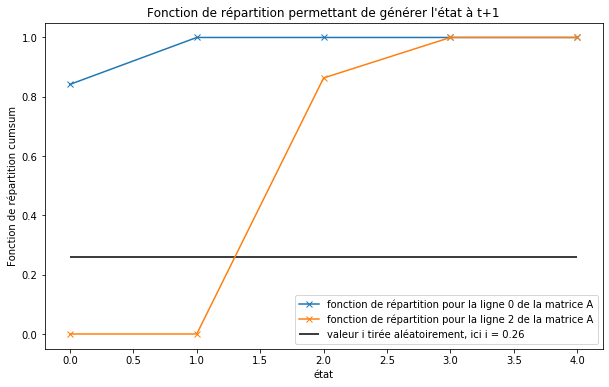

In [28]:
plt.figure(figsize=(10,6))
plt.title('Fonction de répartition permettant de générer l\'état à t+1')
plt.plot(fonction_repartition[0], label = 'fonction de répartition pour la ligne 0 de la matrice A',marker ='x') 
plt.plot(fonction_repartition[2], label = 'fonction de répartition pour la ligne 2 de la matrice A',marker ='x') 
plt.hlines(0.26, 0, 4, label = 'valeur i tirée aléatoirement, ici i = 0.26')
plt.legend(loc = 'best')
plt.ylabel('Fonction de répartition cumsum')
plt.xlabel('état')
plt.show()

**Explication** : similaire à la partie précédente

II.2.3 *Générer une séquence d’observations suivant le modèle de Markov Caché du chiffre 0.
On commencera par générer une séquence d’états suivant ce modèle à l’aide de la fonction
etat_suivant. Puis on générera la séquence d’observations par le même procédé.*

In [29]:
def genere_state_seq(mat):
    state = 0
    seq = [state]
    final_state = mat.shape[0]-1 
    while state != final_state:
        next_state = etat_suivant(state, mat)
        seq.append(next_state)
        state = next_state
    return seq


In [30]:
def generate_obs(mat_trans,mat_obs):
    #generate sequence of states
    sequence = genere_state_seq(mat_trans)
    
    #generate observation's index for each state
    list_observation = []
    for state in sequence:
        obs = etat_suivant(state, mat_obs)     #states must be in rows  transpose mat_obs if needed
        list_observation.append(obs)
    #plot image using matrix v with each observation's index
    image = []
    for i in list_observation:
        
        image.append(v[:,i])
    
    image = np.array(image).T
    
    print(image.shape)

    plt.imshow(image*255, cmap="Greys", interpolation="none", aspect="auto")

(5, 15)
(5, 35)
(5, 14)
(5, 43)
(5, 24)


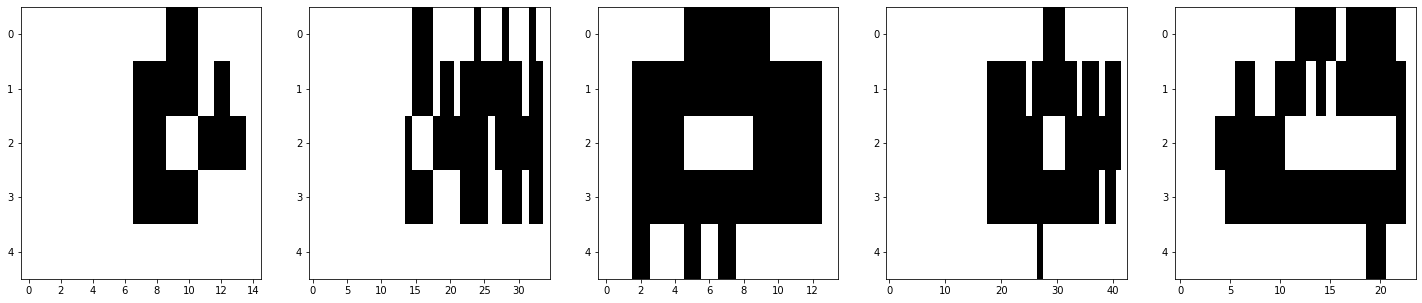

In [31]:
f0= plt.figure(figsize=(25,5))

for i in range(5):
    f0.add_subplot(1,5,i+1)
    generate_obs(A0,B0.T)


II.2.4 *Visualiser le résultat sous forme d’image. Générer des séquences pour le chiffre 7 et le
chiffre 1 (matrices B1.txt, B7.txt, etc...)*

In [32]:
A1 = np.loadtxt(path+'A1.txt')
A7 = np.loadtxt(path+'A7.txt')
B1 = np.loadtxt(path+'B1.txt')
B7 = np.loadtxt(path+'B7.txt')

(5, 10)
(5, 7)
(5, 29)
(5, 34)
(5, 10)


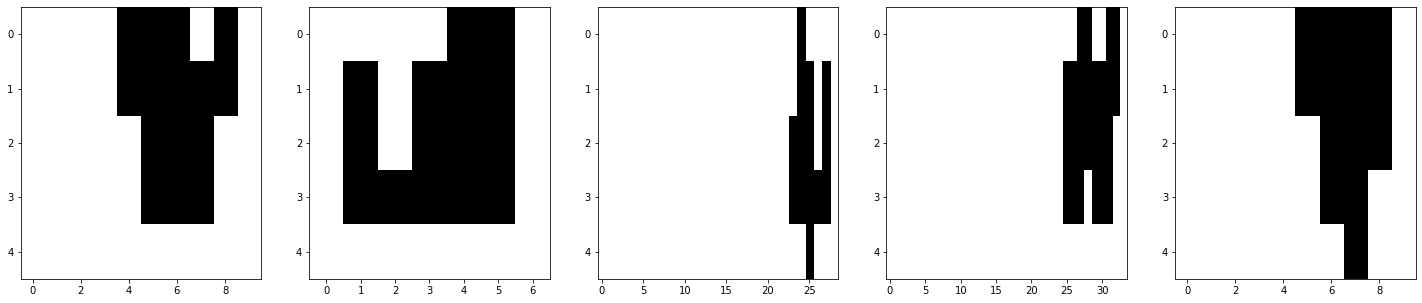

In [33]:
f1= plt.figure(figsize=(25,5))
for i in range(5):
    f1.add_subplot(1,5,i+1)
    generate_obs(A1,B1.T)


(5, 21)
(5, 14)
(5, 11)
(5, 15)
(5, 19)


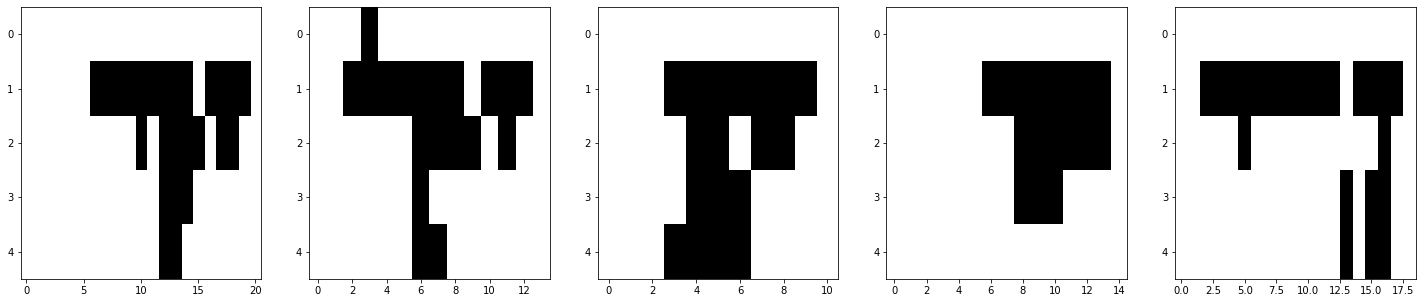

In [34]:
f7= plt.figure(figsize=(25,5))
for i in range(5):
    f7.add_subplot(1,5,i+1)
    generate_obs(A7,B7.T)

## II.3. Calcul de la vraisemblance de séquences d’observations

Les fichiers SeqTest0.txt, SeqTest1.txt, SeqTest7.txt contiennent chacun 10 séquences
d’observations de chiffres des 3 classes 0, 1 et 7, disposés en ligne. Le script suivant extrait la 5 ème observation de la 3 ème séquence des chiffres 0.

In [35]:
filename= path + "SeqTest0.txt"
  
TestChiffres=np.loadtxt(filename)
nex=2
seq= TestChiffres[nex, : ]
seq[4]

1.0

In [36]:
SeqTest0 = np.loadtxt(path+'SeqTest0.txt')
SeqTest1 = np.loadtxt(path+'SeqTest1.txt')
SeqTest7 = np.loadtxt(path+'SeqTest7.txt')

In [37]:
pi1 = np.loadtxt(path+'vect_pi1.txt')
pi7 = np.loadtxt(path+'vect_pi7.txt')

II.3.1 *Calculer la vraisemblance de ces séquences suivant chacun des modèles (0, 1 et 7) par
l’algorithme de Viterbi (on pourra implémenter la version logarithmique de cet algorithme).
Pour cela les matrices A, B et π seront converties en logarithmes (utiliser np.log).*

In [38]:
pd.DataFrame(B1.T)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
1,-0.0,0.000476,0.029521,0.000476,0.214861,0.000476,0.070541,0.000476,0.000476,0.000476,...,0.219368,0.000476,0.000476,0.023673,0.085369,0.000476,0.000476,0.000536,0.000476,0.000476
2,-0.0,0.000409,0.000409,0.003037,0.000409,0.000409,0.000409,0.000409,0.000409,0.000409,...,0.176163,0.000409,0.000409,0.026320,0.534950,0.000409,0.000409,0.047095,0.000409,0.068565
3,-0.0,0.007192,0.125146,0.008395,0.120352,0.005836,0.163519,0.000722,0.000722,0.000722,...,0.144094,0.000722,0.000722,0.000722,0.092293,0.000722,0.000722,0.000722,0.000722,0.000722
4,1.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000


In [39]:
def calcul_vraisemblance(A,B,pi,V):
    
    #initialisation
    alpha = np.zeros((A.shape[0], V.shape[0]))
    alpha[:,0] = pi1 * B.T[:,int(V[0]-1)]

    for t in range(1,V.shape[0]): #obs
        for j in range(A.shape[0]): #etat
            alpha[j,t] = np.max(alpha[:,t - 1]*(A[:,j])) * B.T[j, int(V[t]-1)]
    
    return np.max(alpha[:,-1])

In [40]:
def vraisemblance_seq(A,B,pi,SeqTest):
    vraisemblance_Seqtest = []
    for i in range(len(SeqTest)):
        vraisemblance = calcul_vraisemblance(A,B,pi1,SeqTest[i])
        vraisemblance_Seqtest.append(vraisemblance)
    return vraisemblance_Seqtest

In [41]:
vraisemblance_seq(A0,B0,pi0,SeqTest0)

[2.06510175981344e-13,
 6.400822084623179e-15,
 2.1069604597695692e-17,
 1.0722064390659984e-14,
 8.246299969500078e-22,
 1.0488453823193342e-14,
 4.776077700141268e-16,
 7.81089750315615e-12,
 3.917129600605129e-19,
 3.2864651588365785e-10]

In [42]:
vraisemblance_seq(A1,B1,pi1,SeqTest1)

[6.929365370294003e-24,
 1.8731207451190436e-06,
 7.324305014521608e-11,
 1.2417485759425124e-06,
 1.101697135092775e-06,
 6.544347398520984e-20,
 1.6232665562532446e-13,
 1.225717706983044e-14,
 6.139591196488424e-09,
 1.974796836833719e-05]

In [43]:
vraisemblance_seq(A7,B7,pi7,SeqTest7)

[7.243927987195974e-15,
 2.2667067357811357e-14,
 1.1021419540500785e-21,
 3.2906286256407094e-19,
 3.5014128994869544e-11,
 1.5925184037154988e-13,
 9.022997141001e-10,
 4.472824346535445e-21,
 2.0183034003209845e-14,
 8.03449072309869e-12]

II.3.2 *Donner le résultat de la classification des images de test en considérant un problème à
trois classes : 0, 1 et 7.*

In [44]:
def classification_image(seq):
    classification_dic ={0:'0',1:'1',2:'7'}
    sol1 = calcul_vraisemblance(A0,B0,pi0,seq)
    sol2 = calcul_vraisemblance(A1,B1,pi1,seq)
    sol3 = calcul_vraisemblance(A7,B7,pi7,seq)
    i = np.argmax([sol1,sol2,sol3])
    return classification_dic[i]

In [45]:
def classification_images(SeqTest):
    classification_Seqtest = []
    for i in range(len(SeqTest)):
        image = classification_image(SeqTest[i])
        classification_Seqtest.append(image)
    return classification_Seqtest

In [46]:
classification_images(SeqTest0)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']

In [47]:
classification_images(SeqTest1)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

In [48]:
classification_images(SeqTest7)

['7', '7', '1', '7', '7', '7', '7', '7', '7', '7']

Regardons à quoi ressemble l'image mal classfiée

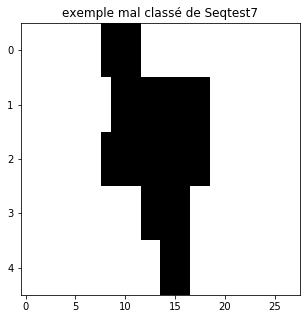

In [49]:
plt.figure(figsize=(5,5))
images = []
for i in SeqTest7[2]:

    images.append(v[:,int(i)-1]) #Vmatrice symbole
image = np.array(images).T
plt.imshow(image*255, cmap="Greys", interpolation="none", aspect="auto")
plt.title('exemple mal classé de Seqtest7')
plt.show()

Cette image est difficile à identifier même pour un ếtre humain.
On peut en conclure que pour un problème à trois classes et sur le jeu de donnée MNIST, les performances du modèle de Markov caché sont bonnes.

Il faudra étudier ces performances sur des jeux de données plus complexe.